In [14]:
import torch
from evoVAE.models.convoVAE import ConvoVAE
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
from evoVAE.trainer.checkerboard_train import train


training_data = datasets.FashionMNIST(
    root="data", train=True, download=False, transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data", train=False, download=False, transform=ToTensor()
)

train_loader = torch.utils.data.DataLoader(training_data, batch_size=20)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=20)


In [8]:
test_model = ConvoVAE(in_channels=1,latentDims=10)
test_model.load_state_dict(torch.load("model_weights_3.pth", map_location=torch.device('cpu')))
test_model.eval()

ConvoVAE(
  (encoder): Sequential(
    (0): Sequential(
      (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
      (1): Dropout(p=0.3, inplace=False)
      (2): LeakyReLU(negative_slope=0.01)
      (3): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): Sequential(
      (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
      (1): Dropout(p=0.3, inplace=False)
      (2): LeakyReLU(negative_slope=0.01)
      (3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (2): Sequential(
      (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
      (1): Dropout(p=0.3, inplace=False)
      (2): LeakyReLU(negative_slope=0.01)
      (3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (3): Sequential(
      (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
      (1): Dropout(p=0.3, inplace=False)
      (2): LeakyReLU(negative_slope=0.01)
      (3): 

In [ ]:
examples = 0
with torch.no_grad():
    for data, _ in train_loader:
       
        modelOutput = test_model(data)
        reconstruction  = modelOutput[0]
        
        sample_idx = torch.randint(len(reconstruction), size=(1,)).item()   

        fig, axs = plt.subplots(1, 2)
        axs[0].imshow(data[sample_idx][0], cmap='gray')
        axs[0].set_title("Original")

        axs[1].imshow(reconstruction[sample_idx][0], cmap='gray')
        axs[1].set_title("Reconstruction")
        
        examples += 1
        if examples == 5:
            break 


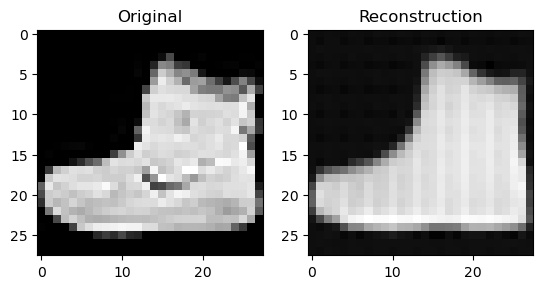

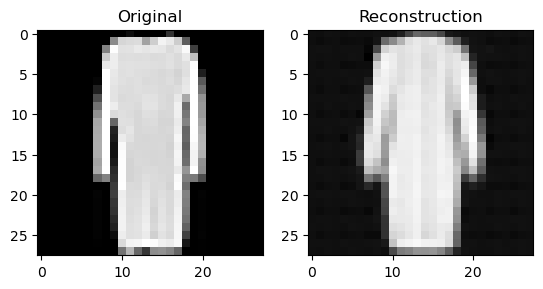

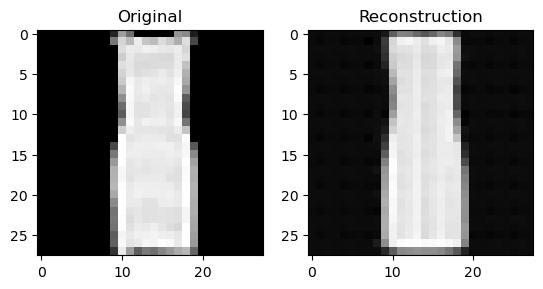

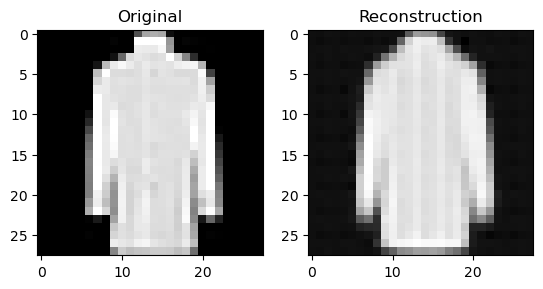

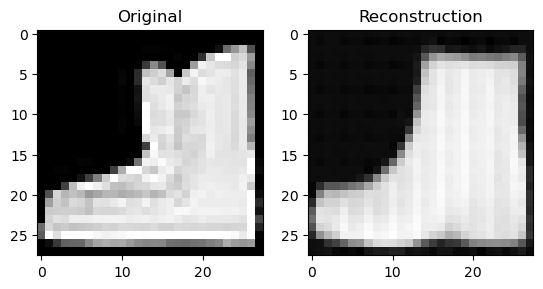

In [13]:

examples = 0
with torch.no_grad():
    for data, _ in train_loader:
       
        modelOutput = test_model(data)
        reconstruction  = modelOutput[0]
        
        sample_idx = torch.randint(len(reconstruction), size=(1,)).item()   

        fig, axs = plt.subplots(1, 2)
        axs[0].imshow(data[sample_idx][0], cmap='gray')
        axs[0].set_title("Original")

        axs[1].imshow(reconstruction[sample_idx][0], cmap='gray')
        axs[1].set_title("Reconstruction")
        
        examples += 1
        if examples == 5:
            break 


KeyboardInterrupt: 

In [ ]:
test[0].shape

torch.Size([1, 1, 28, 28])

In [ ]:
train(model, train_loader, epochs=1)